# **0. BACA DATA**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('steam.csv')
data

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27070,1065230,Room of Pandora,2019-04-24,1,SHEN JIAWEI,SHEN JIAWEI,windows,0,Single-player;Steam Achievements,Adventure;Casual;Indie,Adventure;Indie;Casual,7,3,0,0,0,0-20000,2.09
27071,1065570,Cyber Gun,2019-04-23,1,Semyon Maximov,BekkerDev Studio,windows,0,Single-player,Action;Adventure;Indie,Action;Indie;Adventure,0,8,1,0,0,0-20000,1.69
27072,1065650,Super Star Blast,2019-04-24,1,EntwicklerX,EntwicklerX,windows,0,Single-player;Multi-player;Co-op;Shared/Split ...,Action;Casual;Indie,Action;Indie;Casual,24,0,1,0,0,0-20000,3.99
27073,1066700,New Yankee 7: Deer Hunters,2019-04-17,1,Yustas Game Studio,Alawar Entertainment,windows;mac,0,Single-player;Steam Cloud,Adventure;Casual;Indie,Indie;Casual;Adventure,0,2,0,0,0,0-20000,5.19


#**1. Menentukan tipe game berdasarkan rating yang positif.**
Ditampilkan sebagai berikut:

In [ ]:
dataframe = data
baru1 = pd.DataFrame(dataframe, columns=['genres', 'positive_ratings', 'negative_ratings'])
baru1

,genres,positive_ratings,negative_ratings
0,Action,124534,3339
1,Action,3318,633
2,Action,3416,398
3,Action,1273,267
4,Action,5250,288
...,...,...,...
27070,Adventure;Casual;Indie,3,0
27071,Action;Adventure;Indie,8,1
27072,Action;Casual;Indie,0,1
27073,Adventure;Casual;Indie,2,0


In [ ]:
baru2 = baru1.sort_values(by=['positive_ratings'], ascending=False)
baru3 = baru2.groupby(['genres']).sum()
baru3

,positive_ratings,negative_ratings
genres,,
Accounting;Animation & Modeling;Audio Production;Design & Illustration;Education;Photo Editing;Software Training;Utilities;Video Production;Web Publishing,5,7
Accounting;Education;Software Training;Utilities;Early Access,9,1
Action,3044378,539243
Action;Adventure,2017871,501439
Action;Adventure;Casual,30888,3537
...,...,...
Violent;Simulation;Early Access,1,1
Violent;Simulation;Sports,793,537
Violent;Sports,127,69


In [ ]:
sum_column = baru3["positive_ratings"] + baru3["negative_ratings"]
baru3["Total"] = sum_column
persenan = baru3["positive_ratings"] / baru3["Total"] * 100
baru3["Rating_Positive_@persen"] = persenan
baru3.sort_values(by=['Total'], ascending=False)
baru4 = baru3.sort_values(by=['Total'], ascending=False)
baru4

,positive_ratings,negative_ratings,Total,Rating_Positive_@persen
genres,,,,
Action;Free to Play,3757019,547167,4304186,87.287561
Action,3044378,539243,3583621,84.952566
Action;Adventure,2017871,501439,2519310,80.096177
Action;RPG,1031195,162693,1193888,86.372842
Action;Adventure;Massively Multiplayer,615761,565314,1181075,52.135639
...,...,...,...,...
Animation & Modeling;Audio Production;Software Training;Utilities;Video Production,0,1,1,0.000000
Action;Casual;Indie;Racing;RPG;Simulation;Sports;Early Access,0,1,1,0.000000
Violent;Gore;Adventure;Indie;Strategy,0,1,1,0.000000


In [ ]:
baru4 = pd.DataFrame(baru3, columns=['Total','Rating_Positive_@persen'])
baru5 = baru4.sort_values(by=['Rating_Positive_@persen'], ascending=False)
baru5

,Total,Rating_Positive_@persen
genres,,
Adventure;Indie;Racing;Strategy;Early Access,3,100.0
Violent;Action;Indie;Simulation;Early Access,1,100.0
Action;Adventure;Casual;Simulation;Sports;Strategy;Early Access,3,100.0
Sexual Content;Violent;Gore;Adventure;Indie;RPG;Early Access,2,100.0
Casual;Indie;Utilities,6,100.0
...,...,...
Action;Adventure;Free to Play;Racing;Sports;Early Access,1,0.0
Nudity;Adventure;Casual;Indie;Early Access,11,0.0
Action;Casual;Indie;Racing;Simulation;Sports;Strategy;Early Access,2,0.0


In [ ]:
baru5 = baru4.sort_values(by=['Rating_Positive_@persen'], ascending=False)
baru5.head(5)

,Total,Rating_Positive_@persen
genres,,
Adventure;Indie;Racing;Strategy;Early Access,3,100.0
Violent;Action;Indie;Simulation;Early Access,1,100.0
Action;Adventure;Casual;Simulation;Sports;Strategy;Early Access,3,100.0
Sexual Content;Violent;Gore;Adventure;Indie;RPG;Early Access,2,100.0
Casual;Indie;Utilities,6,100.0


#**2. Menentukan publisher terbaik berdasarkan rata-rata waktu bermain.**
Ditampilkan sebagai berikut:

In [ ]:
play = pd.DataFrame(dataframe, columns=['genres', 'average_playtime', 'median_playtime'])
play

,genres,average_playtime,median_playtime
0,Action,17612,317
1,Action,277,62
2,Action,187,34
3,Action,258,184
4,Action,624,415
...,...,...,...
27070,Adventure;Casual;Indie,0,0
27071,Action;Adventure;Indie,0,0
27072,Action;Casual;Indie,0,0
27073,Adventure;Casual;Indie,0,0


In [ ]:
play['average_playtime'] = play['average_playtime'].astype(float)
play['median_playtime'] = play['median_playtime'].astype(float)
play

,genres,average_playtime,median_playtime
0,Action,17612.0,317.0
1,Action,277.0,62.0
2,Action,187.0,34.0
3,Action,258.0,184.0
4,Action,624.0,415.0
...,...,...,...
27070,Adventure;Casual;Indie,0.0,0.0
27071,Action;Adventure;Indie,0.0,0.0
27072,Action;Casual;Indie,0.0,0.0
27073,Adventure;Casual;Indie,0.0,0.0


In [ ]:
play1 = pd.DataFrame(play, columns=['genres', 'average_playtime', 'median_playtime'])
play1

,genres,average_playtime,median_playtime
0,Action,17612.0,317.0
1,Action,277.0,62.0
2,Action,187.0,34.0
3,Action,258.0,184.0
4,Action,624.0,415.0
...,...,...,...
27070,Adventure;Casual;Indie,0.0,0.0
27071,Action;Adventure;Indie,0.0,0.0
27072,Action;Casual;Indie,0.0,0.0
27073,Adventure;Casual;Indie,0.0,0.0


In [ ]:
play2 = play1.groupby(['genres']).sum()
play2

,average_playtime,median_playtime
genres,,
Accounting;Animation & Modeling;Audio Production;Design & Illustration;Education;Photo Editing;Software Training;Utilities;Video Production;Web Publishing,0.0,0.0
Accounting;Education;Software Training;Utilities;Early Access,0.0,0.0
Action,221960.0,159388.0
Action;Adventure,115553.0,107136.0
Action;Adventure;Casual,2632.0,1650.0
...,...,...
Violent;Simulation;Early Access,0.0,0.0
Violent;Simulation;Sports,0.0,0.0
Violent;Sports,0.0,0.0


In [ ]:
play3 = play2.sort_values(by=['average_playtime'], ascending=False)
play3

,average_playtime,median_playtime
genres,,
Action,221960.0,159388.0
Adventure;Free to Play,194408.0,196043.0
Action;Indie,148156.0,139503.0
Action;Adventure,115553.0,107136.0
Adventure;Indie,112514.0,102402.0
...,...,...
Casual;Free to Play;Indie;Racing;Simulation,0.0,0.0
Casual;Free to Play;Indie;Racing;Strategy,0.0,0.0
Casual;Free to Play;Indie;Simulation;Early Access,0.0,0.0


In [ ]:
topp10 = play3.head(10)
topp10

,average_playtime,median_playtime
genres,,
Action,221960.0,159388.0
Adventure;Free to Play,194408.0,196043.0
Action;Indie,148156.0,139503.0
Action;Adventure,115553.0,107136.0
Adventure;Indie,112514.0,102402.0
Adventure;Casual;Indie,110202.0,113680.0
Strategy,102627.0,102016.0
RPG,100149.0,96945.0
Adventure;Casual;Free to Play;Indie,96401.0,191507.0


In [ ]:
topp5 = play3.head(5)
topp5

,average_playtime,median_playtime
genres,,
Action,221960.0,159388.0
Adventure;Free to Play,194408.0,196043.0
Action;Indie,148156.0,139503.0
Action;Adventure,115553.0,107136.0
Adventure;Indie,112514.0,102402.0


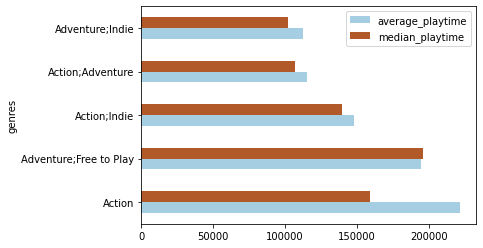

In [ ]:
topp5.plot(kind="barh", fontsize=10, colormap='Paired')

#**3. Menentukan tipe game yang paling banyak dibeli.**
Ditampilkan sebagai berikut:

In [ ]:
beli = pd.DataFrame(dataframe, columns=['genres', 'owners', 'price'])
beli

,genres,owners,price
0,Action,10000000-20000000,7.19
1,Action,5000000-10000000,3.99
2,Action,5000000-10000000,3.99
3,Action,5000000-10000000,3.99
4,Action,5000000-10000000,3.99
...,...,...,...
27070,Adventure;Casual;Indie,0-20000,2.09
27071,Action;Adventure;Indie,0-20000,1.69
27072,Action;Casual;Indie,0-20000,3.99
27073,Adventure;Casual;Indie,0-20000,5.19


In [ ]:
beli['owners'] = beli['owners'].str.replace('-',' ')
beli

,genres,owners,price
0,Action,10000000 20000000,7.19
1,Action,5000000 10000000,3.99
2,Action,5000000 10000000,3.99
3,Action,5000000 10000000,3.99
4,Action,5000000 10000000,3.99
...,...,...,...
27070,Adventure;Casual;Indie,0 20000,2.09
27071,Action;Adventure;Indie,0 20000,1.69
27072,Action;Casual;Indie,0 20000,3.99
27073,Adventure;Casual;Indie,0 20000,5.19


In [ ]:
beli[['RentangAwal','RentangAkhir']] = beli.owners.str.split(expand=True)
beli

,genres,owners,price,RentangAwal,RentangAkhir
0,Action,10000000 20000000,7.19,10000000,20000000
1,Action,5000000 10000000,3.99,5000000,10000000
2,Action,5000000 10000000,3.99,5000000,10000000
3,Action,5000000 10000000,3.99,5000000,10000000
4,Action,5000000 10000000,3.99,5000000,10000000
...,...,...,...,...,...
27070,Adventure;Casual;Indie,0 20000,2.09,0,20000
27071,Action;Adventure;Indie,0 20000,1.69,0,20000
27072,Action;Casual;Indie,0 20000,3.99,0,20000
27073,Adventure;Casual;Indie,0 20000,5.19,0,20000


In [ ]:
beli['RentangAwal'] = pd.to_numeric(beli['RentangAwal'])
beli['RentangAkhir'] = pd.to_numeric(beli['RentangAkhir'])
beli['price'] = pd.to_numeric(beli['price'])
beli

,genres,owners,price,RentangAwal,RentangAkhir
0,Action,10000000 20000000,7.19,10000000,20000000
1,Action,5000000 10000000,3.99,5000000,10000000
2,Action,5000000 10000000,3.99,5000000,10000000
3,Action,5000000 10000000,3.99,5000000,10000000
4,Action,5000000 10000000,3.99,5000000,10000000
...,...,...,...,...,...
27070,Adventure;Casual;Indie,0 20000,2.09,0,20000
27071,Action;Adventure;Indie,0 20000,1.69,0,20000
27072,Action;Casual;Indie,0 20000,3.99,0,20000
27073,Adventure;Casual;Indie,0 20000,5.19,0,20000


In [ ]:
beli1 = beli.groupby(['genres']).mean()
beli1

,price,RentangAwal,RentangAkhir
genres,,,
Accounting;Animation & Modeling;Audio Production;Design & Illustration;Education;Photo Editing;Software Training;Utilities;Video Production;Web Publishing,11.390000,0.000000,20000.000000
Accounting;Education;Software Training;Utilities;Early Access,0.000000,0.000000,20000.000000
Action,9.981174,395527.876631,847746.144721
Action;Adventure,12.245427,321460.055096,707355.371901
Action;Adventure;Casual,4.949661,24576.271186,70677.966102
...,...,...,...
Violent;Simulation;Early Access,4.790000,0.000000,20000.000000
Violent;Simulation;Sports,39.990000,50000.000000,100000.000000
Violent;Sports,8.990000,0.000000,20000.000000


In [ ]:
beli2 = pd.DataFrame(beli1, columns=['price', 'RentangAkhir'])
beli2

,price,RentangAkhir
genres,,
Accounting;Animation & Modeling;Audio Production;Design & Illustration;Education;Photo Editing;Software Training;Utilities;Video Production;Web Publishing,11.390000,20000.000000
Accounting;Education;Software Training;Utilities;Early Access,0.000000,20000.000000
Action,9.981174,847746.144721
Action;Adventure,12.245427,707355.371901
Action;Adventure;Casual,4.949661,70677.966102
...,...,...
Violent;Simulation;Early Access,4.790000,20000.000000
Violent;Simulation;Sports,39.990000,100000.000000
Violent;Sports,8.990000,20000.000000


In [ ]:
final = beli2.sort_values(by=['RentangAkhir'], ascending=False)
final['Pembeli'] =  final['RentangAkhir']
final['Harga'] = final['price']
final1 = pd.DataFrame(final, columns=['Harga', 'Pembeli'])
final1

,Harga,Pembeli
genres,,
Action;Free to Play;Strategy,0.000000,25418750.0
Action;Free to Play;Indie;Massively Multiplayer;RPG;Simulation,0.000000,20000000.0
Action;Adventure;Massively Multiplayer,15.656667,17540000.0
Action;Adventure;Free to Play;Massively Multiplayer,0.000000,10250000.0
Action;Adventure;Free to Play;Simulation;Sports,0.000000,10000000.0
...,...,...
Casual;Indie;RPG;Simulation;Early Access,6.423333,20000.0
Casual;Indie;Racing;Early Access,8.140000,20000.0
Casual;Indie;Racing;RPG;Simulation;Sports,1.690000,20000.0


**START DARI SINI**

Tipe Game Berdasarkan Kategori Harga Termahal

In [ ]:
final2 = final1.sort_values(by=['Harga'], ascending=False)
final2

,Harga,Pembeli
genres,,
Animation & Modeling;Design & Illustration;Education;Software Training;Utilities;Web Publishing;Game Development,178.323333,3.000000e+04
Animation & Modeling;Design & Illustration;Video Production,154.990000,2.000000e+04
Animation & Modeling;Design & Illustration;Education;Utilities;Web Publishing;Game Development,114.990000,2.000000e+04
Animation & Modeling;Design & Illustration;Game Development,110.490000,2.000000e+04
Violent;Gore;Action;Adventure;Indie;Massively Multiplayer,79.890000,2.000000e+04
...,...,...
Violent;Gore;Action;Casual;Indie;Strategy;Early Access,0.000000,2.000000e+04
Free to Play;Strategy;Early Access,0.000000,1.771429e+05
Casual;Free to Play;Indie;Early Access,0.000000,1.757143e+05


In [ ]:
topp5 = final2.head(5)
topp5

,Harga,Pembeli
genres,,
Animation & Modeling;Design & Illustration;Education;Software Training;Utilities;Web Publishing;Game Development,178.323333,30000.0
Animation & Modeling;Design & Illustration;Video Production,154.990000,20000.0
Animation & Modeling;Design & Illustration;Education;Utilities;Web Publishing;Game Development,114.990000,20000.0
Animation & Modeling;Design & Illustration;Game Development,110.490000,20000.0
Violent;Gore;Action;Adventure;Indie;Massively Multiplayer,79.890000,20000.0


(10000.0, 35000.0)

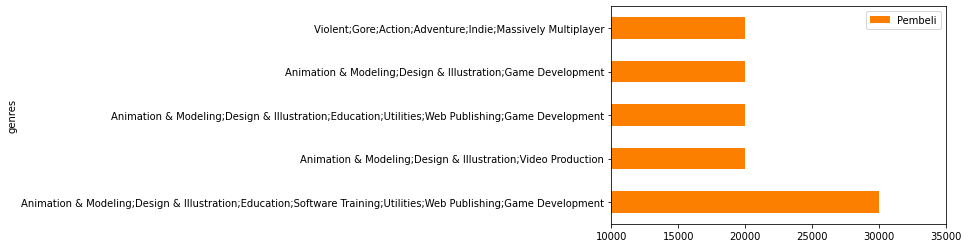

In [ ]:
top5 = pd.DataFrame(topp5.head(5), columns=['Pembeli'])
top5.plot(kind="barh", fontsize=10, colormap='Wistia_r')
plt.xlim(10000, 35000)

Time Game Berdasarkan Harga Tidak Berbayar atau Gratis

In [ ]:
gratis = final1[final1.Harga==0]
gratis.sort_values(by=['Pembeli'], ascending=False)

,Harga,Pembeli
genres,,
Action;Free to Play;Strategy,0.0,25418750.0
Action;Free to Play;Indie;Massively Multiplayer;RPG;Simulation,0.0,20000000.0
Action;Adventure;Free to Play;Massively Multiplayer,0.0,10250000.0
Action;Adventure;Free to Play;Simulation;Sports,0.0,10000000.0
Action;Free to Play;Massively Multiplayer;Simulation,0.0,7512500.0
...,...,...
Adventure;Casual;Free to Play;Indie;RPG;Simulation;Strategy;Early Access,0.0,20000.0
Adventure;Casual;Free to Play;Indie;RPG;Early Access,0.0,20000.0
Adventure;Casual;Free to Play;Early Access,0.0,20000.0


In [ ]:
topp7=gratis.head(7)
topp7

,Harga,Pembeli
genres,,
Action;Free to Play;Strategy,0.0,25418750.0
Action;Free to Play;Indie;Massively Multiplayer;RPG;Simulation,0.0,20000000.0
Action;Adventure;Free to Play;Massively Multiplayer,0.0,10250000.0
Action;Adventure;Free to Play;Simulation;Sports,0.0,10000000.0
Action;Free to Play;Massively Multiplayer;Simulation,0.0,7512500.0
Action;Free to Play,0.0,7268500.0
Action;Adventure;Casual;Free to Play;Indie;Massively Multiplayer;RPG;Simulation,0.0,5000000.0


(3000000.0, 30000000.0)

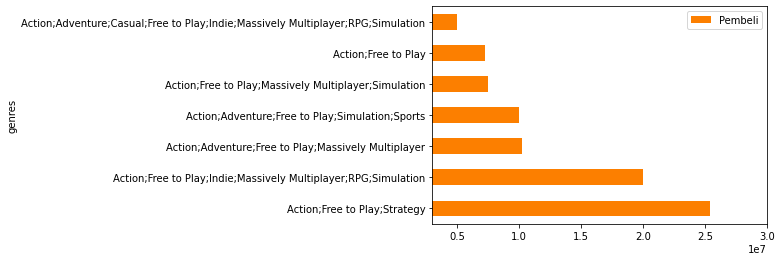

In [ ]:
top7 = pd.DataFrame(gratis.head(7), columns=['Pembeli'])
top7.plot(kind="barh", fontsize=10, colormap='Wistia_r')
plt.xlim(3000000, 30000000)

Tipe Game Dengan Pembeli Terbanyak Berdasarkan Harga Berbayar

In [ ]:
terbanyak = final1[final1.Harga>0]
terbanyak1 = terbanyak.sort_values(by=['Pembeli'], ascending=False)
terbanyak1.reset_index()

,genres,Harga,Pembeli
0,Action;Adventure;Massively Multiplayer,15.656667,1.754000e+07
1,Nudity;Violent;Gore;Action;Adventure;Indie;RPG...,11.490000,2.510000e+06
2,Massively Multiplayer;RPG,12.490000,2.000000e+06
3,Sexual Content;Nudity;Violent;Gore;Action;Adve...,34.990000,2.000000e+06
4,Action;Adventure;Indie;Massively Multiplayer;RPG,11.913846,1.734615e+06
...,...,...,...
1144,Violent;Gore;Action;Adventure;Strategy;Early A...,6.990000,2.000000e+04
1145,Violent;Action;Indie;Racing,6.990000,2.000000e+04
1146,Sexual Content;Nudity;Adventure;RPG,2.545000,2.000000e+04
1147,Sexual Content;Nudity;Adventure;Simulation,12.123333,2.000000e+04


(0.0, 2750000.0)

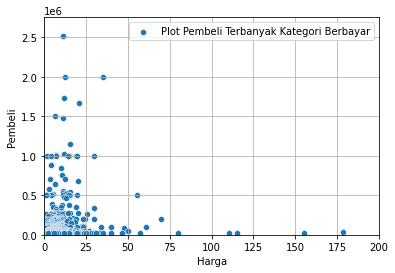

In [ ]:
import seaborn as sns
graf = terbanyak1.drop(terbanyak1.index[0])
sns.scatterplot(data = graf, x='Harga', y = 'Pembeli', legend='auto', label='Plot Pembeli Terbanyak Kategori Berbayar')
plt.grid()
plt.xlim(0, 200)
plt.ylim(0.0, 2750000)

In [ ]:
terbanyak

,Harga,Pembeli
genres,,
Action;Adventure;Massively Multiplayer,15.656667,1.754000e+07
Nudity;Violent;Gore;Action;Adventure;Indie;RPG;Simulation;Strategy;Early Access,11.490000,2.510000e+06
Massively Multiplayer;RPG,12.490000,2.000000e+06
Sexual Content;Nudity;Violent;Gore;Action;Adventure,34.990000,2.000000e+06
Action;Adventure;Indie;Massively Multiplayer;RPG,11.913846,1.734615e+06
...,...,...
Casual;Indie;RPG;Simulation;Early Access,6.423333,2.000000e+04
Casual;Indie;Racing;Early Access,8.140000,2.000000e+04
Casual;Indie;Racing;RPG;Simulation;Sports,1.690000,2.000000e+04


In [ ]:
topp6 = terbanyak.head(6)
topp6

,Harga,Pembeli
genres,,
Action;Adventure;Massively Multiplayer,15.656667,1.754000e+07
Nudity;Violent;Gore;Action;Adventure;Indie;RPG;Simulation;Strategy;Early Access,11.490000,2.510000e+06
Massively Multiplayer;RPG,12.490000,2.000000e+06
Sexual Content;Nudity;Violent;Gore;Action;Adventure,34.990000,2.000000e+06
Action;Adventure;Indie;Massively Multiplayer;RPG,11.913846,1.734615e+06
Action;Adventure;Massively Multiplayer;RPG;Simulation;Strategy,20.656667,1.666667e+06


Jumlah Pembeli Terbanyak Berdasarkan Rentang Harga 

In [ ]:
bins = [0, 5, 10, 20, 50, 180]
bagi = pd.cut(terbanyak['Harga'], bins, right=True)
bagi

genres
Action;Adventure;Massively Multiplayer                                             (10, 20]
Nudity;Violent;Gore;Action;Adventure;Indie;RPG;Simulation;Strategy;Early Access    (10, 20]
Massively Multiplayer;RPG                                                          (10, 20]
Sexual Content;Nudity;Violent;Gore;Action;Adventure                                (20, 50]
Action;Adventure;Indie;Massively Multiplayer;RPG                                   (10, 20]
                                                                                     ...   
Casual;Indie;RPG;Simulation;Early Access                                            (5, 10]
Casual;Indie;Racing;Early Access                                                    (5, 10]
Casual;Indie;Racing;RPG;Simulation;Sports                                            (0, 5]
Casual;Indie;Racing;Simulation;Early Access                                        (10, 20]
Casual;Indie;Massively Multiplayer;Simulation;Sports;Early Access        

In [ ]:
bagi1 = pd.value_counts(bagi)
bagi1

(0, 5]       440
(5, 10]      434
(10, 20]     223
(20, 50]      43
(50, 180]      9
Name: Harga, dtype: int64

In [ ]:
rentang1 = terbanyak.iloc[:,:2][terbanyak.Harga>0][terbanyak.Harga<=5]
rentang2 = terbanyak.iloc[:,:2][terbanyak.Harga>5][terbanyak.Harga<=10]
rentang3 = terbanyak.iloc[:,:2][terbanyak.Harga>10][terbanyak.Harga<=20]
rentang4 = terbanyak.iloc[:,:2][terbanyak.Harga>20][terbanyak.Harga<=50]
rentang5 = terbanyak.iloc[:,:2][terbanyak.Harga>50][terbanyak.Harga<=180]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


In [ ]:
rentang1.loc['1-5', 'Pembeli'] = rentang1.Pembeli.sum()
rentang2.loc['6-10', 'Pembeli'] = rentang2.Pembeli.sum()
rentang3.loc['11-20', 'Pembeli'] = rentang3.Pembeli.sum()
rentang4.loc['21-50', 'Pembeli'] = rentang4.Pembeli.sum()
rentang5.loc['51-180', 'Pembeli'] = rentang5.Pembeli.sum()

In [ ]:
satu = pd.DataFrame(rentang1, index=['1-5'], columns=['Pembeli'])
dua = pd.DataFrame(rentang2, index=['6-10'], columns=['Pembeli'])
tiga = pd.DataFrame(rentang3, index=['11-20'], columns=['Pembeli'])
empat = pd.DataFrame(rentang4, index=['21-50'], columns=['Pembeli'])
lima = pd.DataFrame(rentang5, index=['51-180'], columns=['Pembeli'])
rentang_harga = pd.concat([satu,dua,tiga,empat,lima], axis=0)
rentang_harga['Pembeli'] = rentang_harga['Pembeli'].astype(int)
rentang_harga

,Pembeli
1-5,25116366
6-10,29568443
11-20,50062306
21-50,7868304
51-180,936666


In [ ]:
harga = rentang_harga.reset_index()
harga['Harga'] = harga['index']
harga1 = pd.DataFrame(harga, columns=['Harga', 'Pembeli'])
harga1['Pembeli'] = harga1['Pembeli'].astype(float)
harga1

,Harga,Pembeli
0,1-5,25116366.0
1,6-10,29568443.0
2,11-20,50062306.0
3,21-50,7868304.0
4,51-180,936666.0


(0.0, 52500000.0)

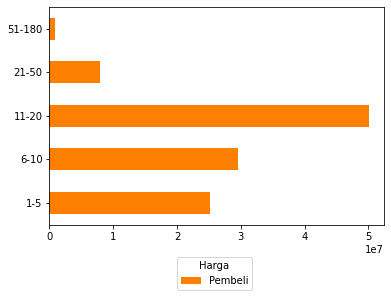

In [ ]:
plot = rentang_harga.plot(kind="barh", fontsize=10, colormap='Wistia_r')
plot.legend(loc=(0.38,-0.30),title = 'Harga',ncol=len(rentang_harga.columns))
plt.xlim(0, 52500000)

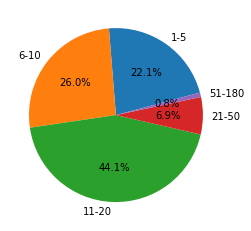

In [ ]:
persen = harga1['Pembeli']
label = harga1['Harga']

plt.pie(persen, labels = label, autopct='%1.1f%%', shadow=False, startangle=15)
plt.show() 
